## PEI Consolidated Revenue Analysis

Using the data from [OD0032 PEI Consolidated Revenues](https://data.princeedwardisland.ca/Government-and-Economy/OD0032-PEI-Consolidated-Revenues/9yq6-iu36) for the years 2011-2019 we aim to mimic the visualizations featured on the open data hub.

In [1]:
%matplotlib inline
# Dependencies.
import pandas as pd

# Style.
from matplotlib import style
style.use('fivethirtyeight')

In [2]:
# Data
df = pd.read_csv('resources/OD0032_PEI_Consolidated_Revenues.csv')
df.head(10)

,Source of Revenue,Type of Revenue,Financial Year,Value
0,Government of Canada,Government of Canada Equalization,2011/12,329022000
1,Government of Canada,Canada Health and Social Transfer,2011/12,165378000
2,Government of Canada,Government of Canada - Other,2011/12,136303000
3,Provincial,Sales Tax,2011/12,214142000
4,Provincial,Real Property Tax,2011/12,97760000
5,Provincial,Personal Income Tax,2011/12,285750000
6,Provincial,Corporate Income Tax,2011/12,42079000
7,Provincial,Other Taxes,2011/12,116683000
8,Provincial,Licenses and Permits,2011/12,24991000
9,Provincial,Fees and Services,2011/12,55601000


In [3]:
# Get unique list of years.
years = df['Financial Year'].unique().tolist()
years

['2011/12',
 '2012/13',
 '2013/14',
 '2014/15',
 '2015/16',
 '2016/17',
 '2017/18',
 '2018/19']

In [4]:
# Create a multi-index DataFrame from the dataset.
multi_df = df.set_index(['Financial Year', 'Source of Revenue', 'Type of Revenue'])
multi_df

Value
Financial Year Source of Revenue    Type of Revenue                             
2011/12        Government of Canada Government of Canada Equalization  329022000
                                    Canada Health and Social Transfer  165378000
                                    Government of Canada - Other       136303000
               Provincial           Sales Tax                          214142000
                                    Real Property Tax                   97760000
...                                                                          ...
2018/19        Provincial           Sales                               32926000
                                    Other income                        41624000
                                    Government Business Enterprises     64740000
                                    Investment Income                   11988000
               Sinking              Sinking Fund Revenue                10515000

[120 rows x 1 columns]

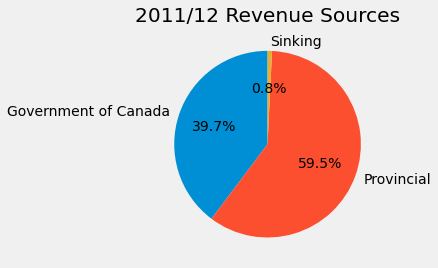

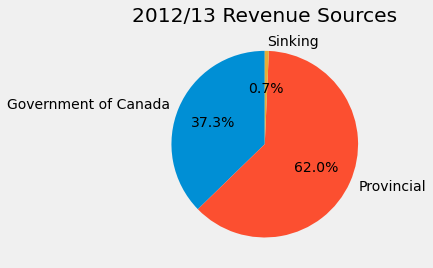

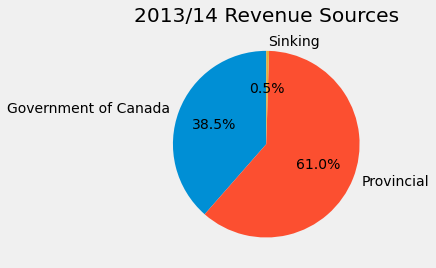

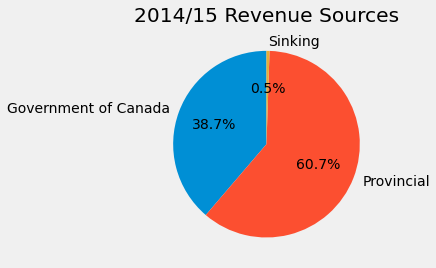

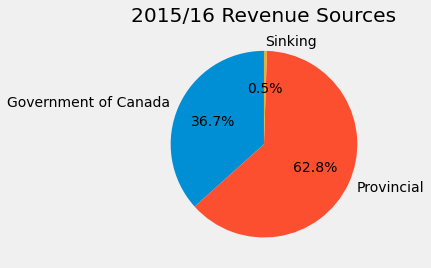

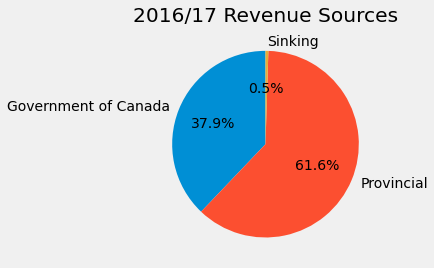

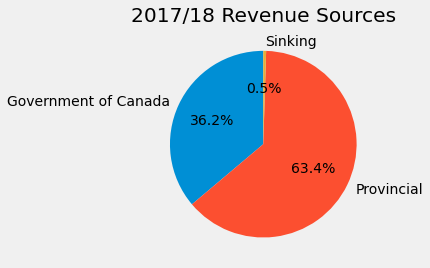

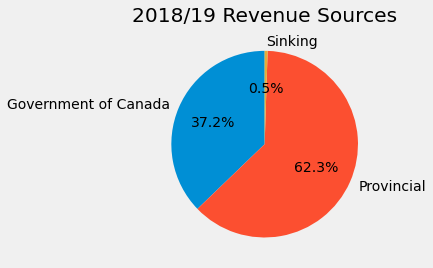

In [5]:
# Plot the Revenue Source for the Source of Revenue column.
for year in years:
    # Create summed DataFrame for value column.
    year_pie = multi_df.loc[year].sum(level=0)
    year_pie.plot.pie(y='Value', title=f'{year} Revenue Sources', label='', autopct='%1.1f%%', legend=False, startangle=90)